# ALIKA RIZVI

# TASK_2:PREDICTION USING UNSUPERVISED ML


->From the given 'Iris'dataset the optimum number of clusters and represnet it visually

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [30]:
df=pd.read_csv('Iris.csv')

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
df.shape

(150, 6)

In [22]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Univariate Analysis

In [34]:
df_setosa=df.loc[df['Species']=='Iris-setosa']
df_virginica=df.loc[df['Species']=='Iris-verginica']
df_versicolor=df.loc[df['Species']=='Iris-versicolor']

In [35]:
df_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


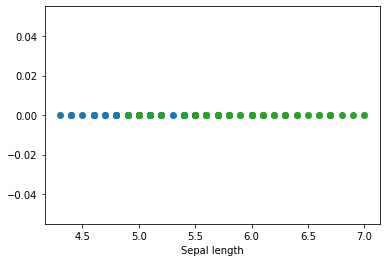

In [38]:
plt.plot(df_setosa['SepalLengthCm'],np.zeros_like(df_setosa['SepalLengthCm']),'o')
plt.plot(df_virginica['SepalLengthCm'],np.zeros_like(df_virginica['SepalLengthCm']),'o')
plt.plot(df_versicolor['SepalLengthCm'],np.zeros_like(df_versicolor['SepalLengthCm']),'o')
plt.xlabel('Sepal length')
plt.show()

# Bivariate Analysis

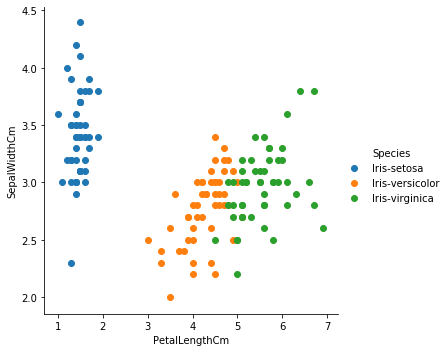

In [40]:
sns.FacetGrid(df,hue="Species",size=5).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend();
plt.show()

C:\Users\Alika Rizvi\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


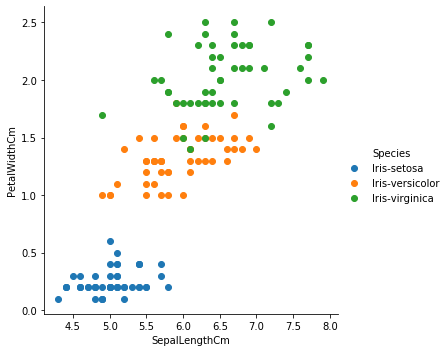

In [41]:
sns.FacetGrid(df,hue="Species",size=5).map(plt.scatter,"SepalLengthCm","PetalWidthCm").add_legend();
plt.show()

# Iris Clustering using K-Means

In [48]:
x=df.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [49]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

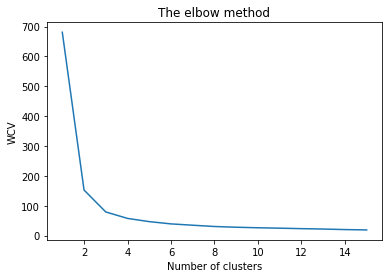

In [52]:
from sklearn.cluster import KMeans


wcv = [] 
for i in range(1, 16):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcv.append(km.inertia_) 


    
plt.plot(range(1, 16), wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV') 
plt.show()

k=3(number of optimum clusters)

In [53]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [55]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], label = 'Iris-versicolor')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], label = 'Iris-setosa')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], label = 'Iris-virginica')



plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True]), 0)' is an invalid key